# Customer Churn Prediction

## Loading Dataset

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('churn_prediction.csv')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [3]:
df.shape

(28382, 21)

## Data Exploration

In [4]:
df.describe(include='all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


In [5]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [6]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

### Data types

In [7]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [9]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_value_count'] = df.nunique()
temp

,data_type,null_count,unique_value_count
customer_id,int64,0,28382
vintage,int64,0,5473
age,int64,0,90
gender,object,525,2
dependents,float64,2463,15
occupation,object,80,5
city,float64,803,1604
customer_nw_category,int64,0,3
branch_code,int64,0,3185
days_since_last_transaction,float64,3223,360


## Univariant analysis

### Histograms

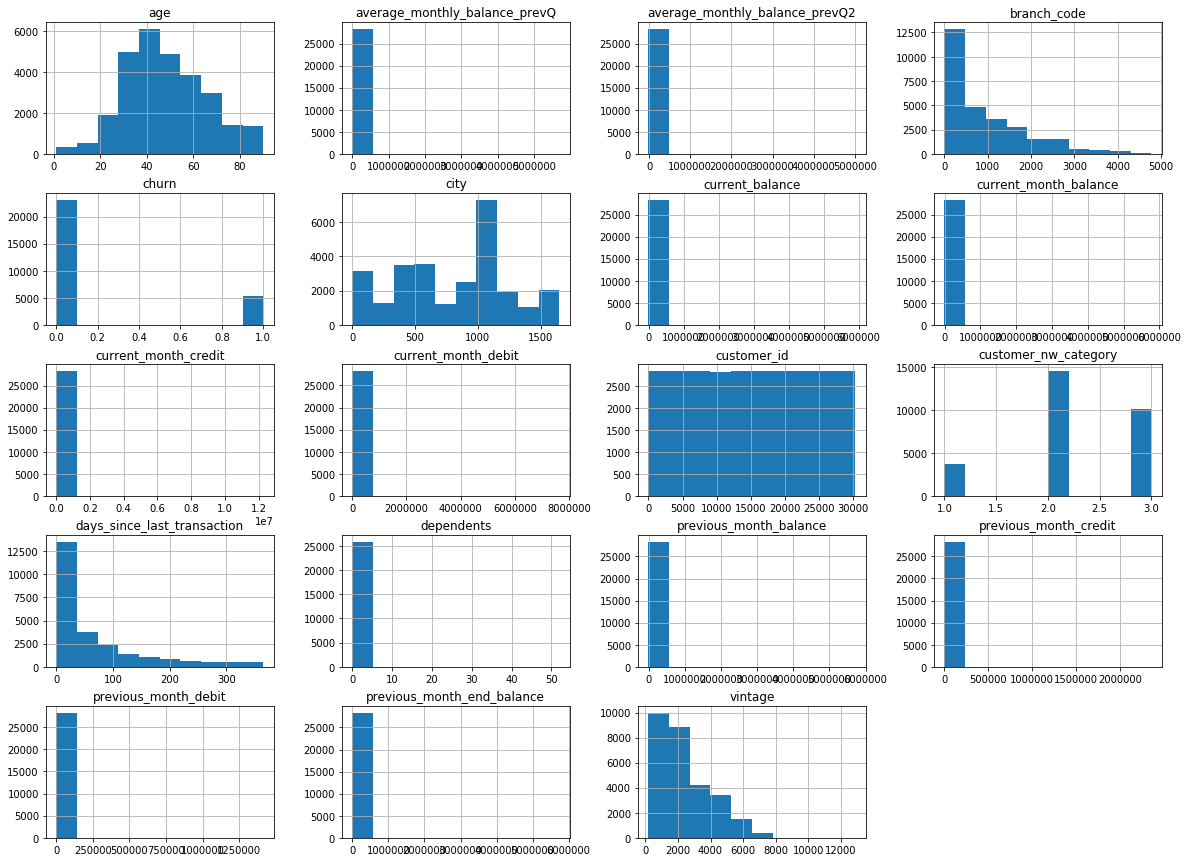

In [10]:
df.hist(figsize=(20,15))
plt.show()

### Value counts

In [11]:
#gender
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [12]:
#dependents
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [13]:
#occupation
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [14]:
#city
df['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

In [15]:
#customer_nw_category
df['customer_nw_category'].value_counts()

2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

In [16]:
#churn
df['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

### Bar plots

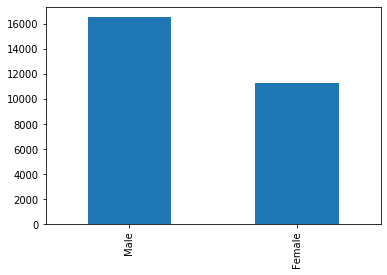

In [17]:
df['gender'].value_counts().plot.bar()

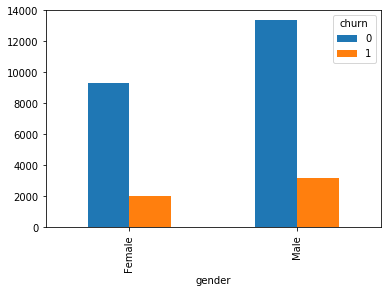

In [18]:
pd.crosstab(df['gender'],df['churn']).plot.bar()

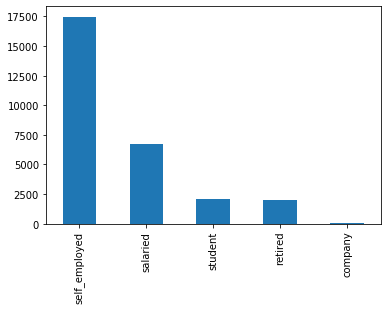

In [19]:
df['occupation'].value_counts().plot.bar()

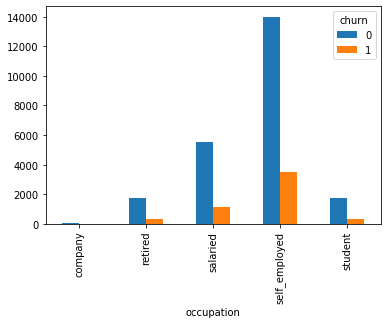

In [20]:
pd.crosstab(df['occupation'],df['churn']).plot.bar()

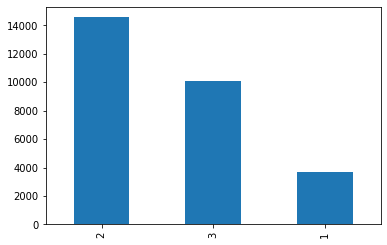

In [21]:
df['customer_nw_category'].value_counts().plot.bar()

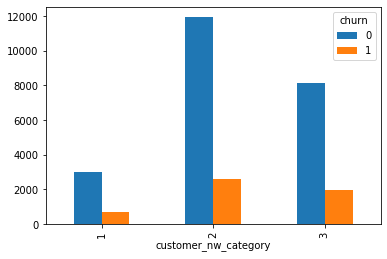

In [22]:
pd.crosstab(df['customer_nw_category'],df['churn']).plot.bar()

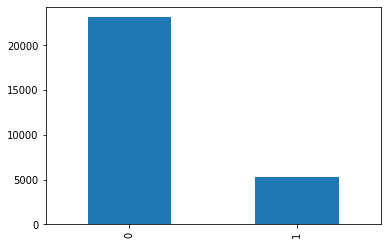

In [23]:
df['churn'].value_counts().plot.bar()

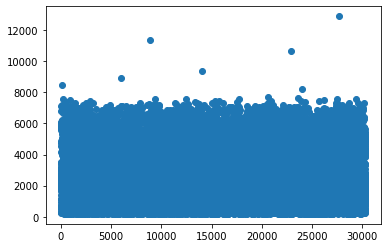

In [24]:
plt.scatter(df['customer_id'],df['vintage'])
plt.show()

## Data Manipulation

- Drop Duplicates
- Fill missing values
- Correct the data types
- Fix spelling errors

### Drop duplicates

In [25]:
df = df.drop_duplicates()
df.shape

(28382, 21)

### Fill missing values

In [26]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [27]:
#dependents
df['dependents'] = df['dependents'].fillna(df['dependents'].median())

In [28]:
#occupation
for i in range(len(df)):
    if pd.isnull(df['occupation'][i]):
        if df['age'][i] <= 60 :
            df['occupation'][i] = 'self_employed'
        else:
            df['occupation'][i] = 'retired'

C:\Users\praneeth\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\praneeth\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
df['occupation'].value_counts()

self_employed    17517
salaried          6704
retired           2063
student           2058
company             40
Name: occupation, dtype: int64

In [30]:
#city
x = df['city'].max()
print(x)

1649.0


In [31]:
for i in range(len(df)):
    if pd.isnull(df['city'][i]):
        df['city'][i] = float(x+1)

C:\Users\praneeth\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
df['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
1614.0       1
1199.0       1
633.0        1
1206.0       1
679.0        1
Name: city, Length: 1605, dtype: int64

In [33]:
#days since last transaction
df['transaction'] = df['days_since_last_transaction'].isnull()*1

In [34]:
for i in range(len(df)):
    if pd.isnull(df['days_since_last_transaction'][i]):
        df['days_since_last_transaction'][i] = float(df['vintage'][i])

C:\Users\praneeth\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
#gender
df['gender'] = df['gender'].fillna('other')

In [36]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
transaction                       0
dtype: int64

### Data types

In [37]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
transaction                         int32
dtype: object

In [38]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,transaction
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0
1,2,310,35,Male,0.0,self_employed,1650.0,2,3214,60.0,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,2356.0,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,1
3,5,478,90,other,0.0,self_employed,1020.0,2,582,147.0,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,0
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0


In [39]:
for i in range(len(df)):
    df['dependents'][i] = int(df['dependents'][i])
    df['city'][i] = int(df['city'][i])
    df['days_since_last_transaction'][i] = int(df['days_since_last_transaction'][i])

C:\Users\praneeth\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\praneeth\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\praneeth\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after r

### Replaceing Categories

#### Update names in columns

In [40]:
#city
city_temp=df['city'].value_counts().sort_values(ascending=True)
city_temp

679.0        1
1168.0       1
262.0        1
182.0        1
1627.0       1
          ... 
834.0     1138
146.0     1291
409.0     1334
1096.0    2016
1020.0    3479
Name: city, Length: 1605, dtype: int64

In [41]:
city_temp = city_temp[city_temp<30]

In [42]:
df['city'] = df['city'].apply(lambda x: 1650 if x in city_temp else x)
df['city'].value_counts()

1650.0    7171
1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
          ... 
724.0       30
179.0       30
1348.0      30
1110.0      30
1034.0      30
Name: city, Length: 97, dtype: int64

In [43]:
len(df['city'].unique())

97

## Bivariant analysis

In [44]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'transaction'],
      dtype='object')

### strip plot

#### Gender

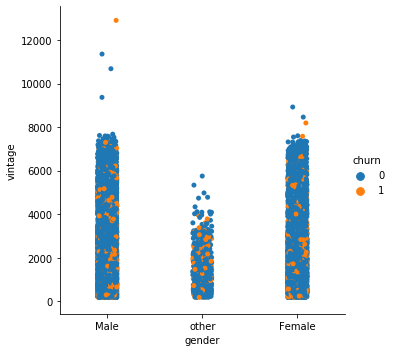

In [45]:
sns.catplot(x='gender',y='vintage',hue='churn',data=df)

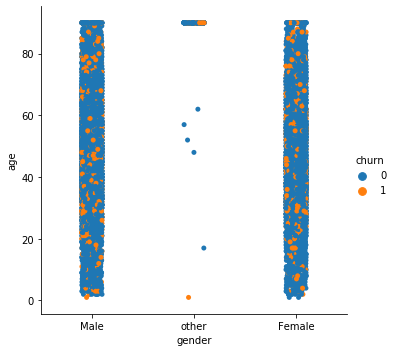

In [46]:
sns.catplot(x='gender',y='age',hue='churn',data=df)

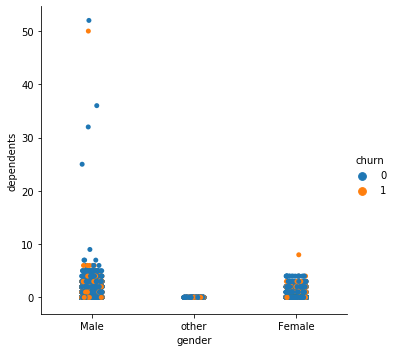

In [47]:
sns.catplot(x='gender',y='dependents',hue='churn',data=df)

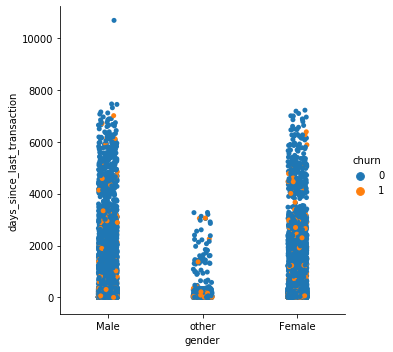

In [48]:
sns.catplot(x='gender',y='days_since_last_transaction',hue='churn',data=df)

#### Occupation

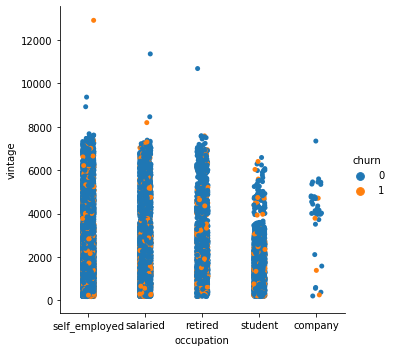

In [49]:
sns.catplot(x='occupation',y='vintage',hue='churn',data=df)

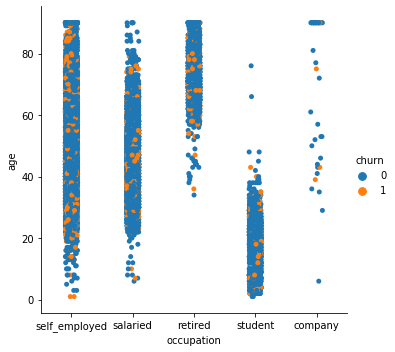

In [50]:
sns.catplot(x='occupation',y='age',hue='churn',data=df)

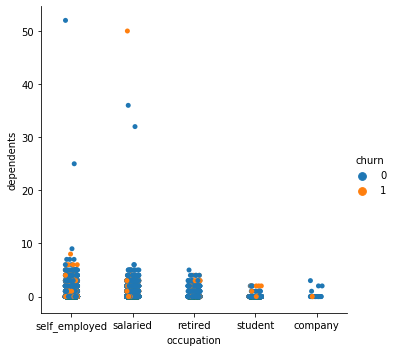

In [51]:
sns.catplot(x='occupation',y='dependents',hue='churn',data=df)

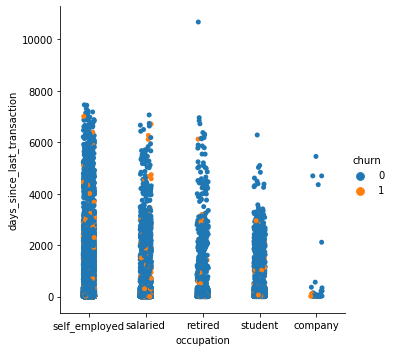

In [52]:
sns.catplot(x='occupation',y='days_since_last_transaction',hue='churn',data=df)

#### customer nw category

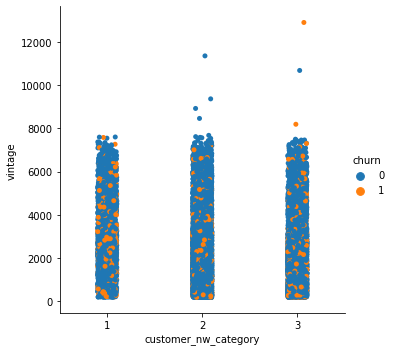

In [53]:
sns.catplot(x='customer_nw_category',y='vintage',hue='churn',data=df)

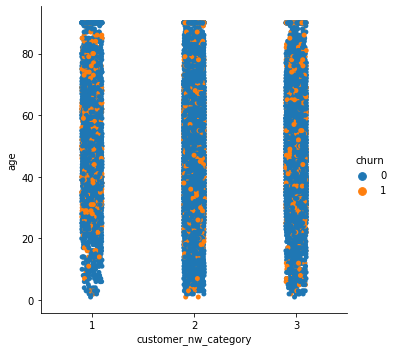

In [54]:
sns.catplot(x='customer_nw_category',y='age',hue='churn',data=df)

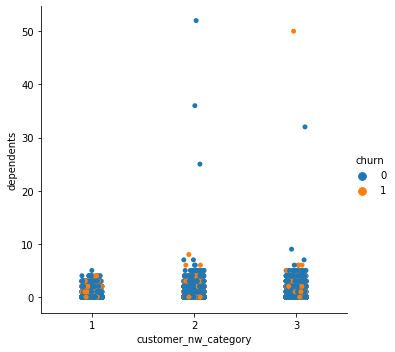

In [55]:
sns.catplot(x='customer_nw_category',y='dependents',hue='churn',data=df)

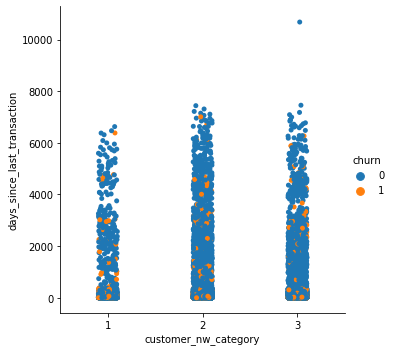

In [56]:
sns.catplot(x='customer_nw_category',y='days_since_last_transaction',hue='churn',data=df)

### Scatter plots

In [57]:
colors={0:'green',1:'red'}

Text(0.5, 1.0, 'pervious_month_debit')

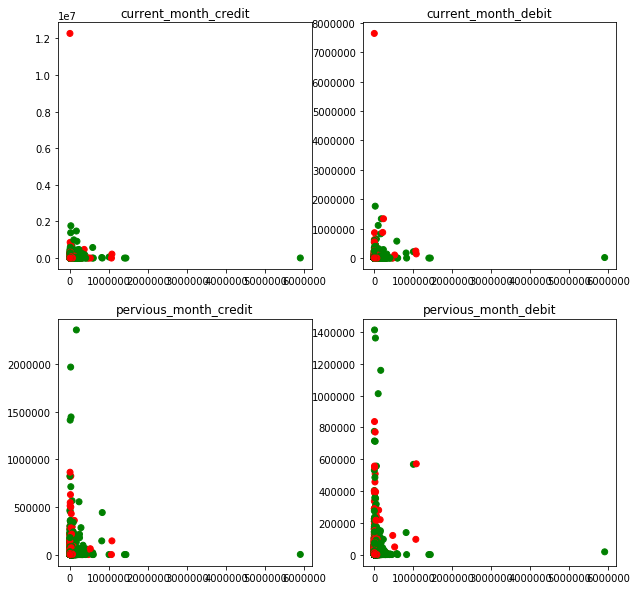

In [58]:
#current balance vs credit & debit
fig,axs = plt.subplots(2,2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0,0].scatter(df['current_balance'],df['current_month_credit'],c=df['churn'].apply(lambda x:colors[x]))
axs[0,0].set_title('current_month_credit')

axs[0,1].scatter(df['current_balance'],df['current_month_debit'],c=df['churn'].apply(lambda x:colors[x]))
axs[0,1].set_title('current_month_debit')

axs[1,0].scatter(df['current_balance'],df['previous_month_credit'],c=df['churn'].apply(lambda x:colors[x]))
axs[1,0].set_title('pervious_month_credit')

axs[1,1].scatter(df['current_balance'],df['previous_month_debit'],c=df['churn'].apply(lambda x:colors[x]))
axs[1,1].set_title('pervious_month_debit')

Text(0.5, 1.0, 'pervious_month_debit')

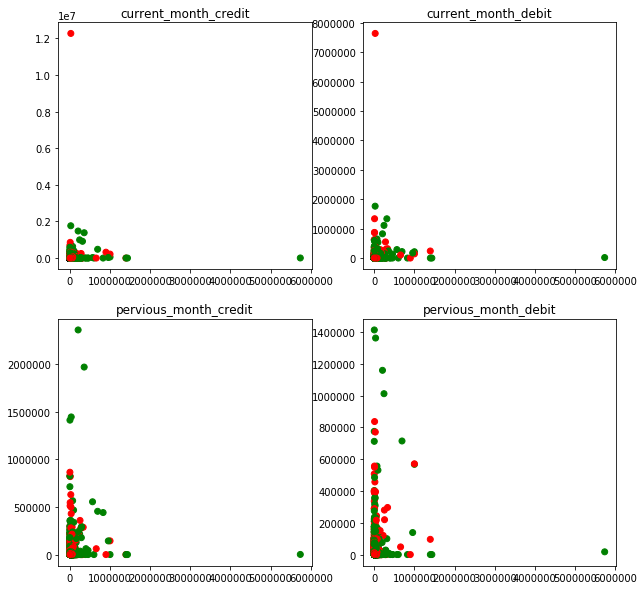

In [59]:
#previous month end balance vs credit & debit
fig,axs = plt.subplots(2,2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0,0].scatter(df['previous_month_end_balance'],df['current_month_credit'],c=df['churn'].apply(lambda x:colors[x]))
axs[0,0].set_title('current_month_credit')

axs[0,1].scatter(df['previous_month_end_balance'],df['current_month_debit'],c=df['churn'].apply(lambda x:colors[x]))
axs[0,1].set_title('current_month_debit')

axs[1,0].scatter(df['previous_month_end_balance'],df['previous_month_credit'],c=df['churn'].apply(lambda x:colors[x]))
axs[1,0].set_title('pervious_month_credit')

axs[1,1].scatter(df['previous_month_end_balance'],df['previous_month_debit'],c=df['churn'].apply(lambda x:colors[x]))
axs[1,1].set_title('pervious_month_debit')

Text(0.5, 1.0, 'current_month_debit')

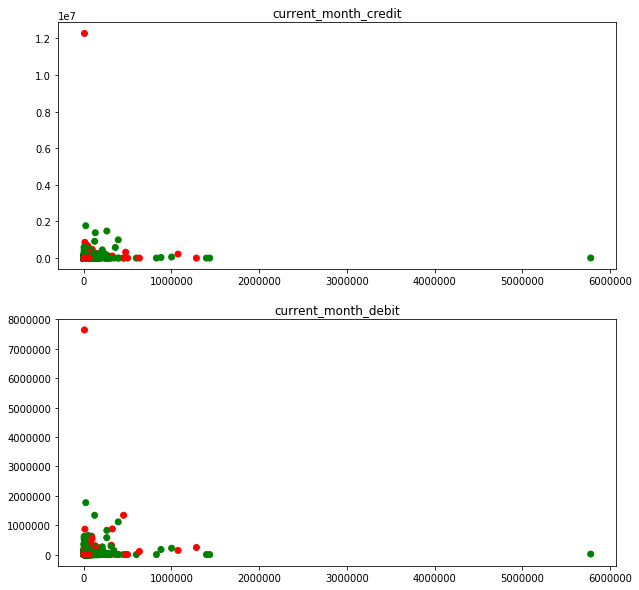

In [60]:
#current_month_balance vs credit & debit
fig,axs = plt.subplots(2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0].scatter(df['current_month_balance'],df['current_month_credit'],c=df['churn'].apply(lambda x:colors[x]))
axs[0].set_title('current_month_credit')

axs[1].scatter(df['current_month_balance'],df['current_month_debit'],c=df['churn'].apply(lambda x:colors[x]))
axs[1].set_title('current_month_debit')


Text(0.5, 1.0, 'pervious_month_debit')

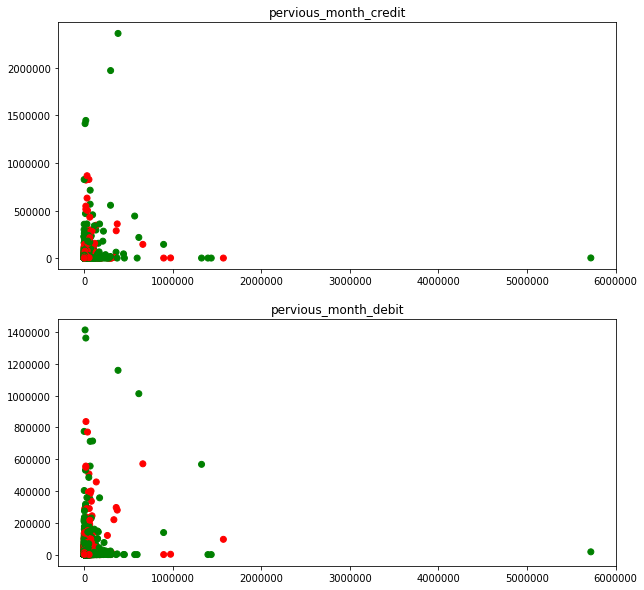

In [61]:
#pervious month balance vs credit & debit
fig,axs = plt.subplots(2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0].scatter(df['previous_month_balance'],df['previous_month_credit'],c=df['churn'].apply(lambda x:colors[x]))
axs[0].set_title('pervious_month_credit')

axs[1].scatter(df['previous_month_balance'],df['previous_month_debit'],c=df['churn'].apply(lambda x:colors[x]))
axs[1].set_title('pervious_month_debit')

Text(0.5, 1.0, 'average_monthly_balance_prevQ2')

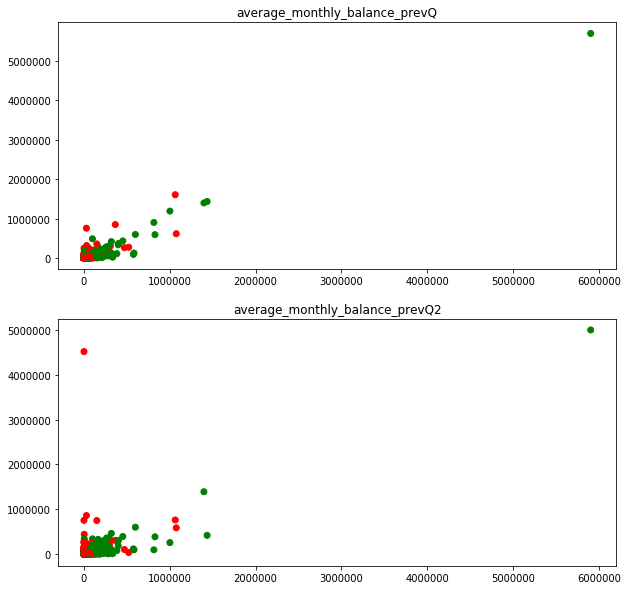

In [62]:
# current balance vs avg preq
fig,axs = plt.subplots(2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0].scatter(df['current_balance'],df['average_monthly_balance_prevQ'],c=df['churn'].apply(lambda x:colors[x]))
axs[0].set_title('average_monthly_balance_prevQ')

axs[1].scatter(df['current_balance'],df['average_monthly_balance_prevQ2'],c=df['churn'].apply(lambda x:colors[x]))
axs[1].set_title('average_monthly_balance_prevQ2')

Text(0.5, 1.0, 'average_monthly_balance_prevQ2')

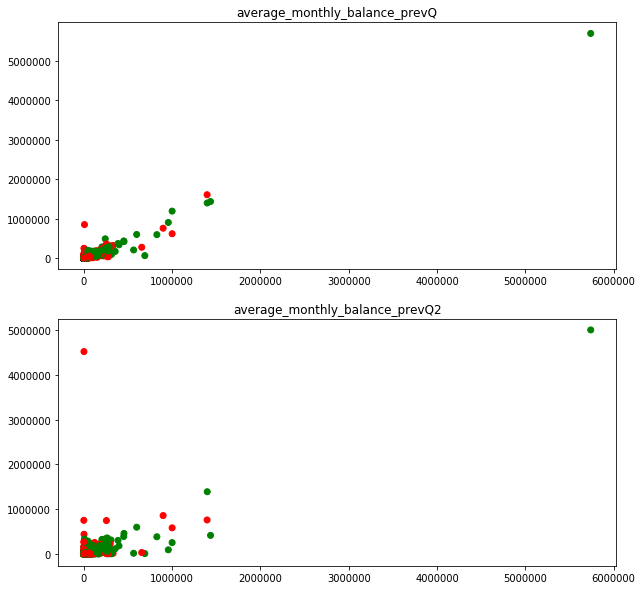

In [63]:
# previous month end balance vs avg preq
fig,axs = plt.subplots(2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0].scatter(df['previous_month_end_balance'],df['average_monthly_balance_prevQ'],c=df['churn'].apply(lambda x:colors[x]))
axs[0].set_title('average_monthly_balance_prevQ')

axs[1].scatter(df['previous_month_end_balance'],df['average_monthly_balance_prevQ2'],c=df['churn'].apply(lambda x:colors[x]))
axs[1].set_title('average_monthly_balance_prevQ2')

Text(0.5, 1.0, 'average_monthly_balance_prevQ2')

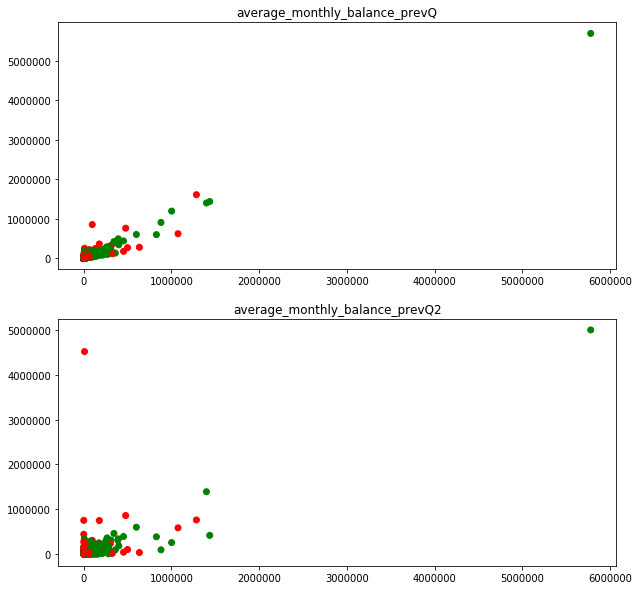

In [64]:
# current month balance vs avg prevq
fig,axs = plt.subplots(2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0].scatter(df['current_month_balance'],df['average_monthly_balance_prevQ'],c=df['churn'].apply(lambda x:colors[x]))
axs[0].set_title('average_monthly_balance_prevQ')

axs[1].scatter(df['current_month_balance'],df['average_monthly_balance_prevQ2'],c=df['churn'].apply(lambda x:colors[x]))
axs[1].set_title('average_monthly_balance_prevQ2')

Text(0.5, 1.0, 'average_monthly_balance_prevQ2')

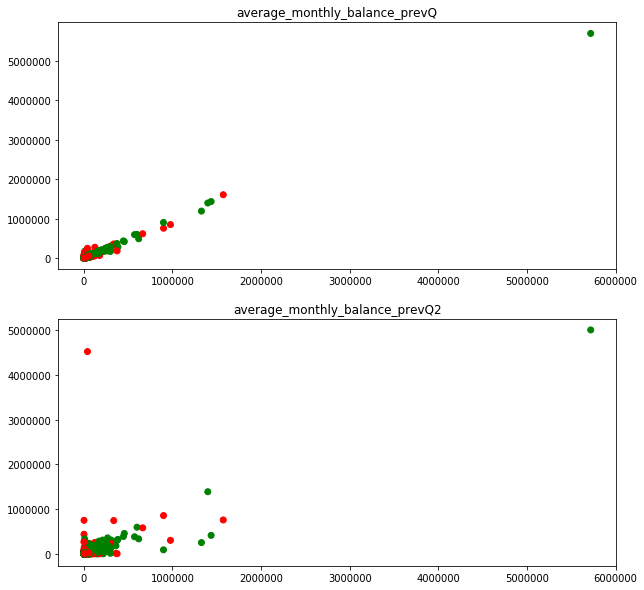

In [65]:
# previous month balance vs avg prevq
fig,axs = plt.subplots(2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0].scatter(df['previous_month_balance'],df['average_monthly_balance_prevQ'],c=df['churn'].apply(lambda x:colors[x]))
axs[0].set_title('average_monthly_balance_prevQ')

axs[1].scatter(df['previous_month_balance'],df['average_monthly_balance_prevQ2'],c=df['churn'].apply(lambda x:colors[x]))
axs[1].set_title('average_monthly_balance_prevQ2')

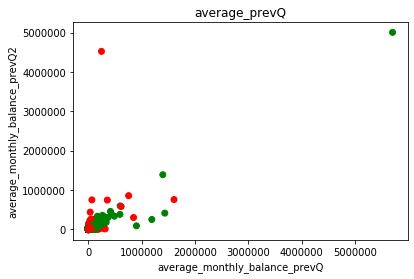

In [66]:
# avg prevQ
plt.scatter(df['average_monthly_balance_prevQ'],df['average_monthly_balance_prevQ2'],c=df['churn'].apply(lambda x:colors[x]))
plt.xlabel('average_monthly_balance_prevQ')
plt.ylabel('average_monthly_balance_prevQ2')
plt.title('average_prevQ')
plt.show()

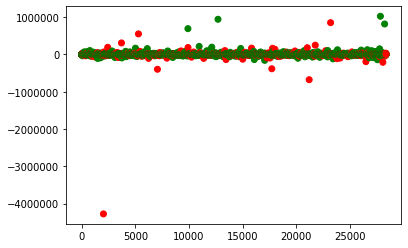

In [67]:
temp = []
for i in range(len(df)):
    x = df['average_monthly_balance_prevQ'][i] - df['average_monthly_balance_prevQ2'][i]
    temp.append(x)
plt.scatter(range(len(df)),temp,c=df['churn'].apply(lambda x:colors[x]))

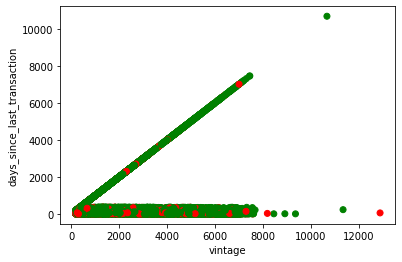

In [68]:
plt.scatter(df['vintage'],df['days_since_last_transaction'],c=df['churn'].apply(lambda x:colors[x]))
plt.xlabel('vintage')
plt.ylabel('days_since_last_transaction')
plt.show()

### Bar plots

In [69]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'transaction'],
      dtype='object')

#### current balance

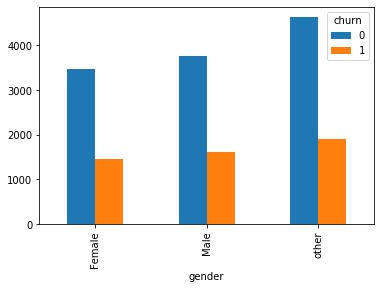

In [70]:
df.pivot_table(values='current_balance',index='gender',columns='churn',aggfunc='median').plot.bar()

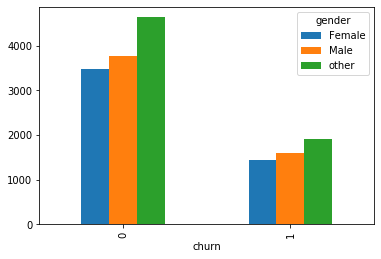

In [71]:
df.pivot_table(values='current_balance',index='churn',columns='gender',aggfunc='median').plot.bar()

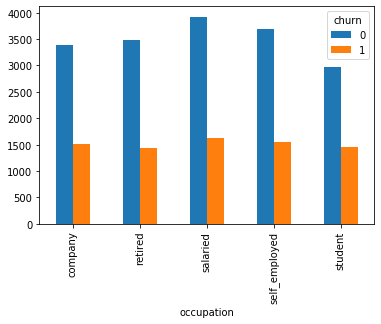

In [72]:
df.pivot_table(values='current_balance',index='occupation',columns='churn',aggfunc='median').plot.bar()

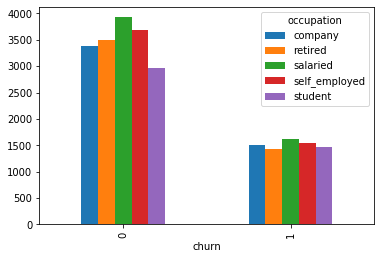

In [73]:
df.pivot_table(values='current_balance',index='churn',columns='occupation',aggfunc='median').plot.bar()

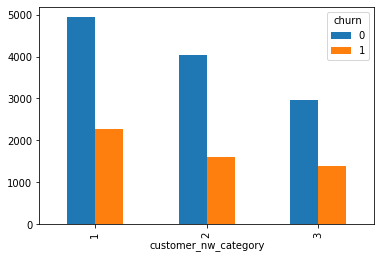

In [74]:
df.pivot_table(values='current_balance',index='customer_nw_category',columns='churn',aggfunc='median').plot.bar()

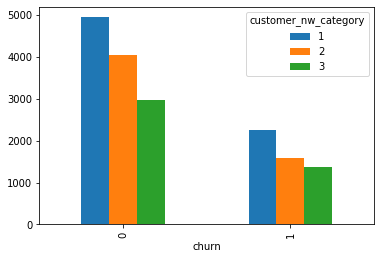

In [75]:
df.pivot_table(values='current_balance',index='churn',columns='customer_nw_category',aggfunc='median').plot.bar()

#### vintage

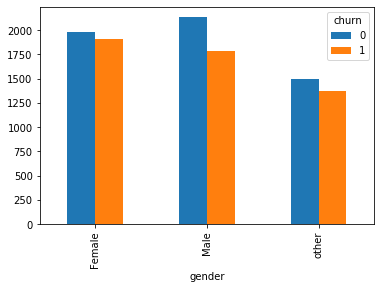

In [76]:
df.pivot_table(values='vintage',index='gender',columns='churn',aggfunc='median').plot.bar()

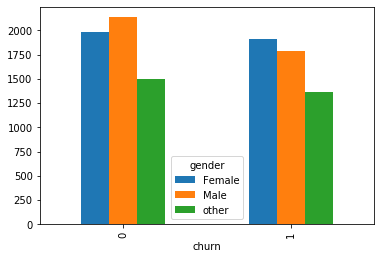

In [77]:
df.pivot_table(values='vintage',index='churn',columns='gender',aggfunc='median').plot.bar()

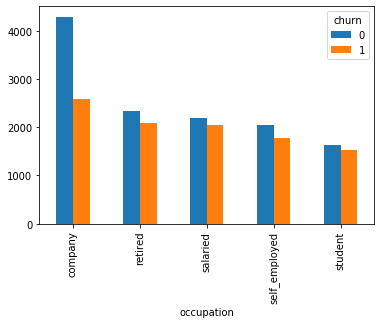

In [78]:
df.pivot_table(values='vintage',index='occupation',columns='churn',aggfunc='median').plot.bar()

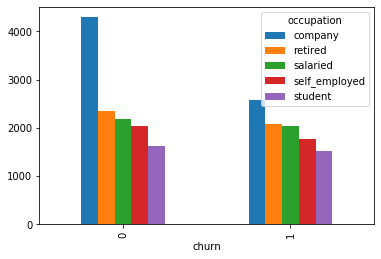

In [79]:
df.pivot_table(values='vintage',index='churn',columns='occupation',aggfunc='median').plot.bar()

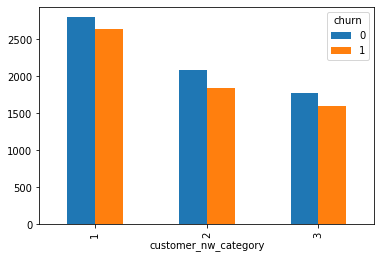

In [80]:
df.pivot_table(values='vintage',index='customer_nw_category',columns='churn',aggfunc='median').plot.bar()

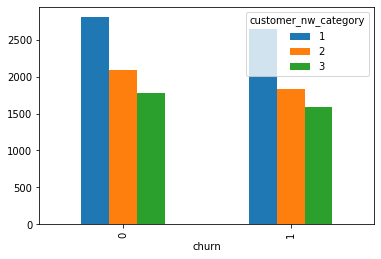

In [81]:
df.pivot_table(values='vintage',index='churn',columns='customer_nw_category',aggfunc='median').plot.bar()

#### age

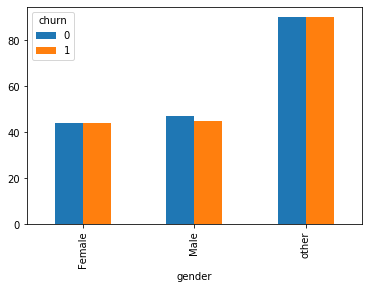

In [82]:
df.pivot_table(values='age',index='gender',columns='churn',aggfunc='median').plot.bar()

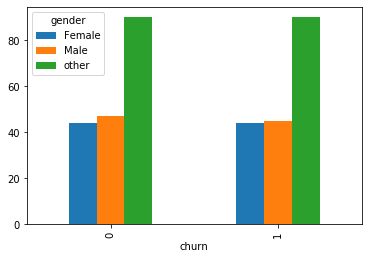

In [83]:
df.pivot_table(values='age',index='churn',columns='gender',aggfunc='median').plot.bar()

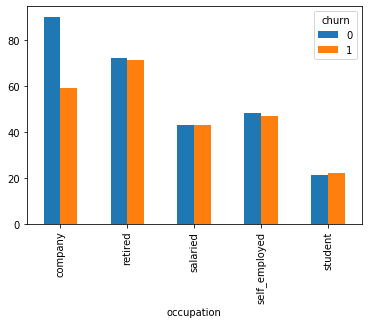

In [84]:
df.pivot_table(values='age',index='occupation',columns='churn',aggfunc='median').plot.bar()

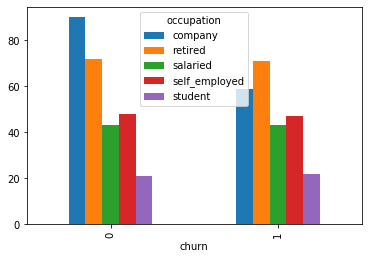

In [85]:
df.pivot_table(values='age',index='churn',columns='occupation',aggfunc='median').plot.bar()

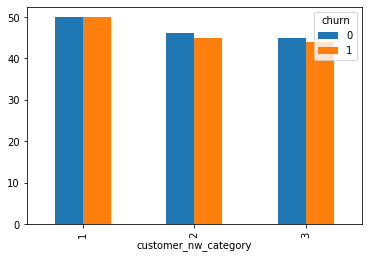

In [86]:
df.pivot_table(values='age',index='customer_nw_category',columns='churn',aggfunc='median').plot.bar()

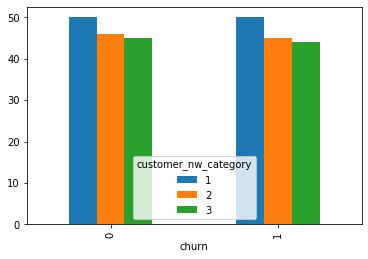

In [87]:
df.pivot_table(values='age',index='churn',columns='customer_nw_category',aggfunc='median').plot.bar()

#### Days since last transaction

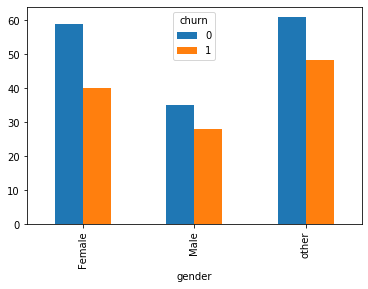

In [88]:
df.pivot_table(values='days_since_last_transaction',index='gender',columns='churn',aggfunc='median').plot.bar()

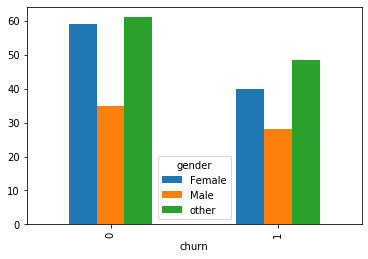

In [89]:
df.pivot_table(values='days_since_last_transaction',index='churn',columns='gender',aggfunc='median').plot.bar()

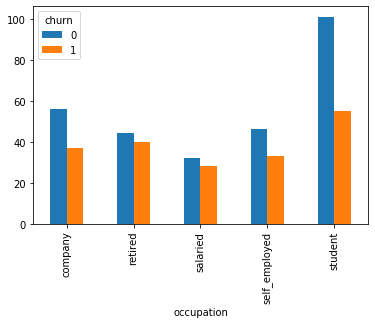

In [90]:
df.pivot_table(values='days_since_last_transaction',index='occupation',columns='churn',aggfunc='median').plot.bar()

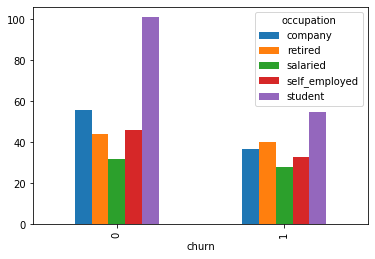

In [91]:
df.pivot_table(values='days_since_last_transaction',index='churn',columns='occupation',aggfunc='median').plot.bar()

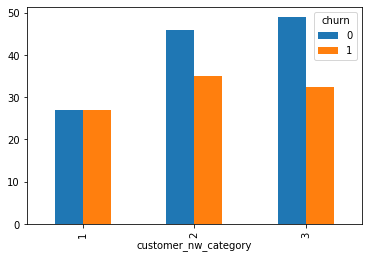

In [92]:
df.pivot_table(values='days_since_last_transaction',index='customer_nw_category',columns='churn',aggfunc='median').plot.bar()

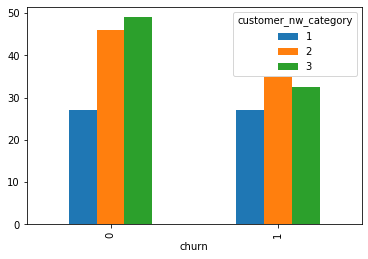

In [93]:
df.pivot_table(values='days_since_last_transaction',index='churn',columns='customer_nw_category',aggfunc='median').plot.bar()

### Box plot

In [94]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'transaction'],
      dtype='object')

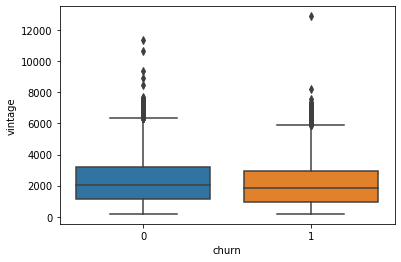

In [95]:
sns.boxplot(x='churn',y='vintage',data=df)

In [96]:
df.vintage = df['vintage'].apply(lambda x: np.mean(df['vintage']) if (x>8000) else x)

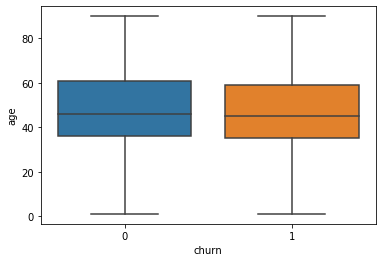

In [97]:
sns.boxplot(x='churn',y='age',data=df)

In [98]:
df.age = df['age'].apply(lambda x: np.mean(df['age']) if (x>80) else x)

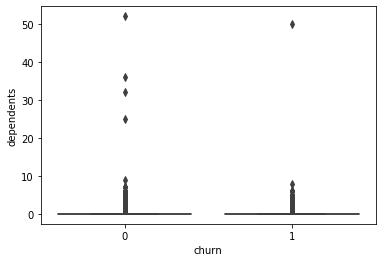

In [99]:
sns.boxplot(x='churn',y='dependents',data=df)

In [100]:
df.dependents = df['dependents'].apply(lambda x: df['dependents'].mode()[0] if (x>20) else x)

### Out liers

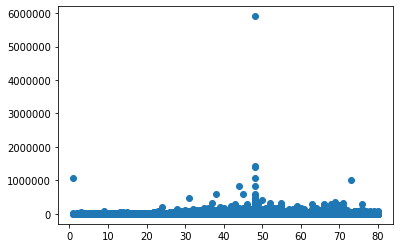

In [101]:
#current balance
plt.scatter(x='age',y='current_balance',data=df)
plt.show()

In [102]:
df['current_balance'] = df['current_balance'].apply(lambda x: np.mean(df['current_balance']) if (x>2000000) else x)

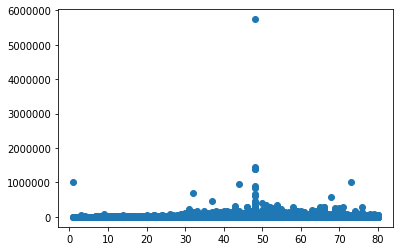

In [103]:
# previous month end balance
plt.scatter(x='age',y='previous_month_end_balance',data=df)
plt.show()

In [104]:
df['previous_month_end_balance'] = df['previous_month_end_balance'].apply(lambda x: np.mean(df['current_balance']) if (x>2000000) else x)

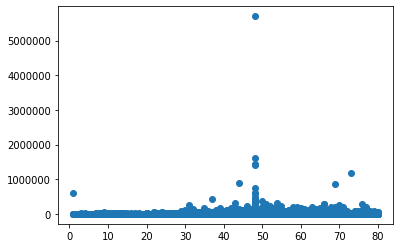

In [105]:
# average_monthly_balance_prevQ 
plt.scatter(x='age',y='average_monthly_balance_prevQ',data=df)
plt.show()

In [106]:
df['average_monthly_balance_prevQ'] = df['average_monthly_balance_prevQ'].apply(lambda x: np.mean(df['average_monthly_balance_prevQ']) if (x>2000000) else x)

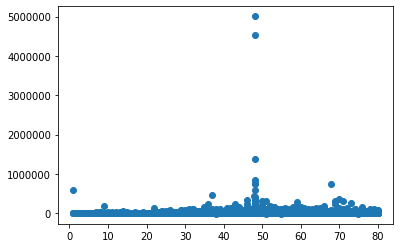

In [107]:
# average_monthly_balance_prevQ2 
plt.scatter(x='age',y='average_monthly_balance_prevQ2',data=df)
plt.show()

In [108]:
df['average_monthly_balance_prevQ2'] = df['average_monthly_balance_prevQ2'].apply(lambda x: np.mean(df['average_monthly_balance_prevQ2']) if (x>2000000) else x)

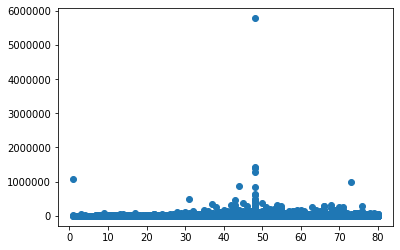

In [109]:
#current month balance
plt.scatter(x='age',y='current_month_balance',data=df)
plt.show()

In [110]:
df['current_month_balance'] = df['current_month_balance'].apply(lambda x: np.mean(df['current_month_balance']) if (x>2000000) else x)

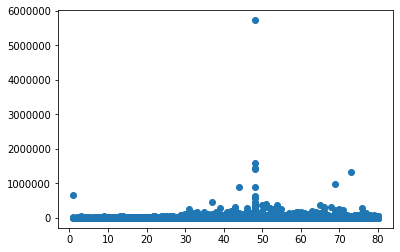

In [111]:
#previous month balance
plt.scatter(x='age',y='previous_month_balance',data=df)
plt.show()

In [112]:
df['previous_month_balance'] = df['previous_month_balance'].apply(lambda x: np.mean(df['previous_month_balance']) if (x>2000000) else x)

### Heat map

In [113]:
corr = df.corr()
corr

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,transaction
customer_id,1.000000,-0.006192,0.002360,-0.007016,0.004401,0.009618,-0.000286,-0.001132,0.016042,0.013839,0.011926,0.010967,0.002494,-0.006414,0.002603,-0.008760,0.013228,0.011697,-0.002723,-0.000972
vintage,-0.006192,1.000000,0.234519,0.091963,-0.088580,-0.168271,-0.382565,0.160803,0.009040,0.011058,0.009436,0.019969,0.002901,0.028226,0.005497,0.024145,0.006514,0.009226,-0.065190,-0.012717
age,0.002360,0.234519,1.000000,0.053683,0.001984,-0.040998,-0.039729,0.007024,0.036844,0.036663,0.042751,0.048827,0.007651,0.025163,0.010412,0.024466,0.036499,0.040771,-0.016518,-0.042519
dependents,-0.007016,0.091963,0.053683,1.000000,0.016158,0.006973,-0.009518,-0.059955,-0.003835,-0.000561,0.000469,0.003315,0.004048,0.031713,0.009610,0.037966,-0.001943,0.000446,0.033685,-0.079655
city,0.004401,-0.088580,0.001984,0.016158,1.000000,0.110844,0.124944,0.002034,-0.006812,-0.002865,-0.006875,-0.004789,-0.005816,-0.012807,-0.009837,-0.012622,-0.006096,-0.006598,0.012791,0.027039
customer_nw_category,0.009618,-0.168271,-0.040998,0.006973,0.110844,1.000000,0.235059,0.004032,-0.099457,-0.097090,-0.098689,-0.113181,-0.025254,-0.072374,-0.035917,-0.071721,-0.098345,-0.095645,0.006551,0.013640
branch_code,-0.000286,-0.382565,-0.039729,-0.009518,0.124944,0.235059,1.000000,-0.085576,-0.014442,-0.013290,-0.010789,-0.010085,-0.013988,-0.023849,-0.016944,-0.017584,-0.012605,-0.010138,0.035469,-0.033255
days_since_last_transaction,-0.001132,0.160803,0.007024,-0.059955,0.002034,0.004032,-0.085576,1.000000,-0.016907,-0.015643,-0.015284,-0.008048,-0.016027,-0.038587,-0.022467,-0.042574,-0.016887,-0.014341,-0.083733,0.812099
current_balance,0.016042,0.009040,0.036844,-0.003835,-0.006812,-0.099457,-0.014442,-0.016907,1.000000,0.847689,0.875871,0.667838,0.053122,0.108944,0.075722,0.137744,0.949973,0.833410,-0.038370,-0.016784
previous_month_end_balance,0.013839,0.011058,0.036663,-0.000561,-0.002865,-0.097090,-0.013290,-0.015643,0.847689,1.000000,0.916620,0.720328,0.053990,0.190925,0.108509,0.178214,0.928156,0.915698,0.015259,-0.015308


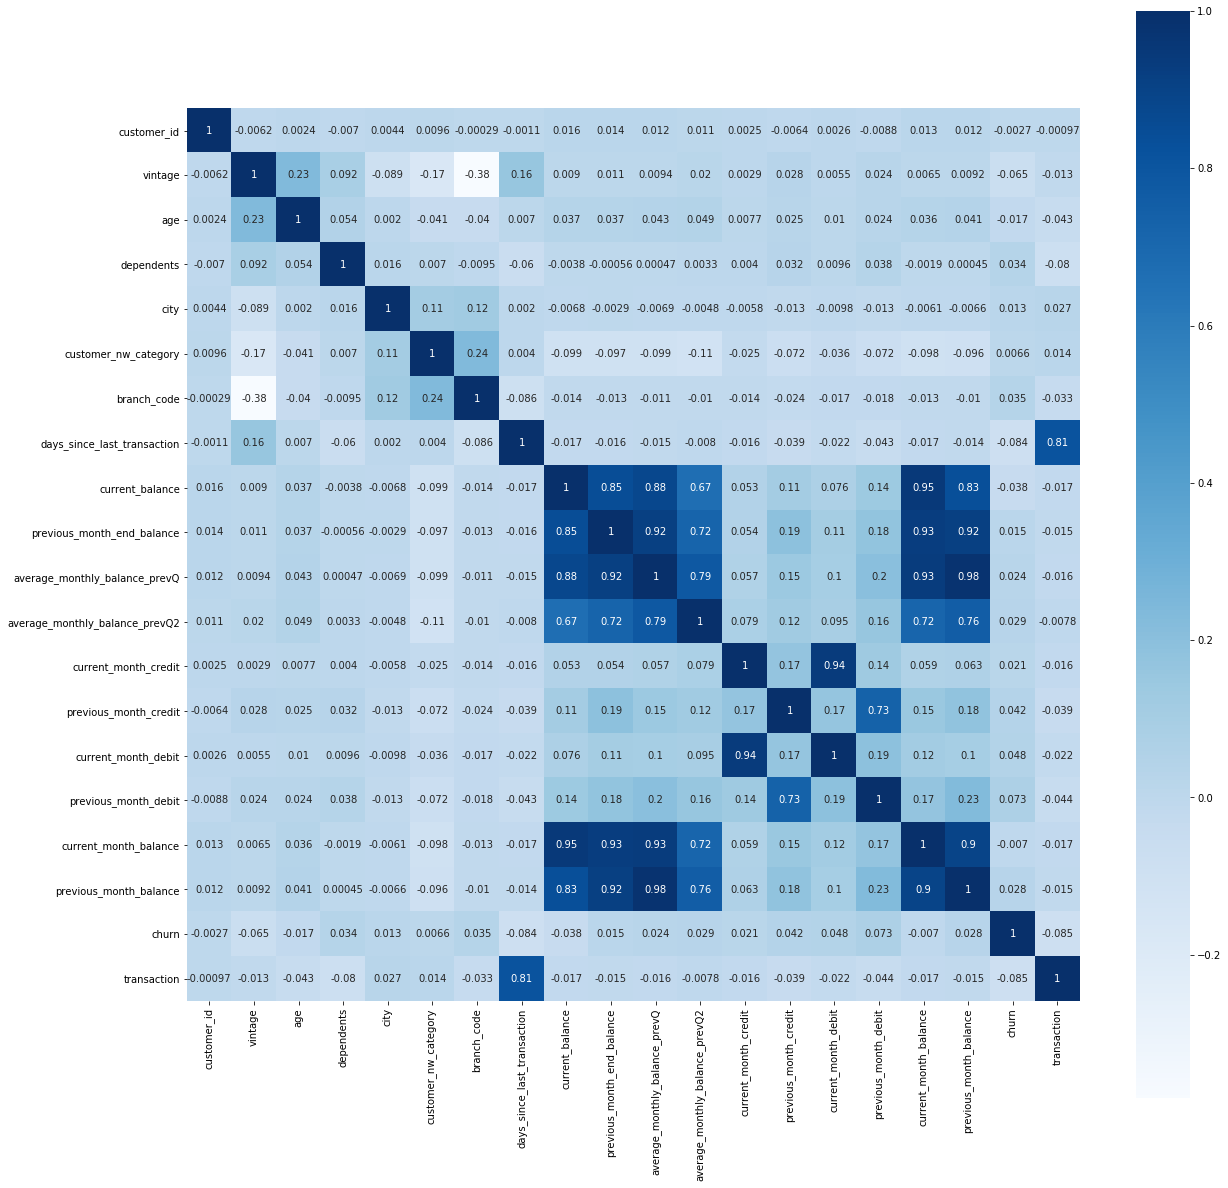

In [114]:
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='Blues',ax=ax)

## Preparing Dataset

In [115]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,transaction
0,1,3135.0,66.000000,Male,0.0,self_employed,1650.0,2,755,224.0,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0
1,2,310.0,35.000000,Male,0.0,self_employed,1650.0,2,3214,60.0,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0
2,4,2356.0,31.000000,Male,0.0,salaried,146.0,2,41,2356.0,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,1
3,5,478.0,48.208336,other,0.0,self_employed,1020.0,2,582,147.0,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,0
4,6,2531.0,42.000000,Male,2.0,self_employed,1494.0,3,388,58.0,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0


In [116]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'transaction'],
      dtype='object')

### Label Encoding

In [117]:
from sklearn.preprocessing import LabelEncoder

In [118]:
# Gender
le_g = LabelEncoder()
df['gender'] = le_g.fit_transform(df['gender'])

In [119]:
#Occupation
le_o = LabelEncoder()
df['occupation'] = le_o.fit_transform(df['occupation'])

In [120]:
#City
le_c = LabelEncoder()
df['city'] = le_c.fit_transform(df['city'])

In [121]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,transaction
0,1,3135.0,66.000000,1,0.0,3,96,2,755,224.0,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0
1,2,310.0,35.000000,1,0.0,3,96,2,3214,60.0,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0
2,4,2356.0,31.000000,1,0.0,2,7,2,41,2356.0,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,1
3,5,478.0,48.208336,2,0.0,3,60,2,582,147.0,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,0
4,6,2531.0,42.000000,1,2.0,3,84,3,388,58.0,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0


In [122]:
df.dtypes

customer_id                         int64
vintage                           float64
age                               float64
gender                              int32
dependents                        float64
occupation                          int32
city                                int64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
transaction                         int32
dtype: object

### One Hot Encoding

In [123]:
dummies_o = pd.get_dummies(df['occupation'])
dummies_o.head()

,0,1,2,3,4
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [124]:
dummies_c = pd.get_dummies(df['customer_nw_category'])
dummies_c.head()

,1,2,3
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [125]:
dummies_g = pd.get_dummies(df['gender'])
dummies_g.head()

,0,1,2
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [126]:
df1 = df.drop(['occupation','gender','customer_nw_category'],axis=1)
df1.head()

,customer_id,vintage,age,dependents,city,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,transaction
0,1,3135.0,66.000000,0.0,96,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0
1,2,310.0,35.000000,0.0,96,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0
2,4,2356.0,31.000000,0.0,7,41,2356.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,1
3,5,478.0,48.208336,0.0,60,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,0
4,6,2531.0,42.000000,2.0,84,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0


In [127]:
df1 = pd.concat([df1,dummies_o.drop([0],axis=1)],axis=1)
df1 = pd.concat([df1,dummies_c.drop([1],axis=1)],axis=1)
df1 = pd.concat([df1,dummies_g.drop([2],axis=1)],axis=1)
df1.head()

,customer_id,vintage,age,dependents,city,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,churn,transaction,1,2,3,4,2,3,0,1
0,1,3135.0,66.000000,0.0,96,755,224.0,1458.71,1458.71,1458.71,...,0,0,0,0,1,0,1,0,0,1
1,2,310.0,35.000000,0.0,96,3214,60.0,5390.37,8704.66,7799.26,...,0,0,0,0,1,0,1,0,0,1
2,4,2356.0,31.000000,0.0,7,41,2356.0,3913.16,5815.29,4910.17,...,0,1,0,1,0,0,1,0,0,1
3,5,478.0,48.208336,0.0,60,582,147.0,2291.91,2291.91,2084.54,...,1,0,0,0,1,0,1,0,0,0
4,6,2531.0,42.000000,2.0,84,388,58.0,927.72,1401.72,1643.31,...,1,0,0,0,1,0,0,1,0,1


In [128]:
X = df1.drop(['customer_id','branch_code','churn'],axis=1)
X.head()

,vintage,age,dependents,city,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,...,previous_month_balance,transaction,1,2,3,4,2,3,0,1
0,3135.0,66.000000,0.0,96,224.0,1458.71,1458.71,1458.71,1449.07,0.20,...,1458.71,0,0,0,1,0,1,0,0,1
1,310.0,35.000000,0.0,96,60.0,5390.37,8704.66,7799.26,12419.41,0.56,...,8787.61,0,0,0,1,0,1,0,0,1
2,2356.0,31.000000,0.0,7,2356.0,3913.16,5815.29,4910.17,2815.94,0.61,...,5070.14,1,0,1,0,0,1,0,0,1
3,478.0,48.208336,0.0,60,147.0,2291.91,2291.91,2084.54,1006.54,0.47,...,1669.79,0,0,0,1,0,1,0,0,0
4,2531.0,42.000000,2.0,84,58.0,927.72,1401.72,1643.31,1871.12,0.33,...,1677.16,0,0,0,1,0,0,1,0,1


In [129]:
y = df1['churn']
y.head()

0    0
1    0
2    0
3    1
4    1
Name: churn, dtype: int64

### Feature Engineering

In [130]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[ 0.48119979,  1.31066003, -0.38911022, ..., -0.74395944,
        -0.81387401,  0.84565462],
       [-1.27843197, -0.73467752, -0.38911022, ..., -0.74395944,
        -0.81387401,  0.84565462],
       [-0.00402256, -0.99859204, -0.38911022, ..., -0.74395944,
        -0.81387401,  0.84565462],
       ...,
       [-1.28652939,  0.05706605, -0.38911022, ..., -0.74395944,
        -0.81387401,  0.84565462],
       [ 0.13861662,  0.25500194,  3.37365854, ...,  1.34415931,
        -0.81387401,  0.84565462],
       [-0.00838271, -1.85631424, -0.38911022, ..., -0.74395944,
        -0.81387401,  0.84565462]])

### Train,Test split

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

## Classification

### K Neighbors classifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knnmodel = KNN(n_neighbors=21)
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [133]:
from sklearn.metrics import accuracy_score,f1_score

accuracy_knnmodel=accuracy_score(y_train, knnmodel.predict(X_train))

f1_score_knnmodel=f1_score(y_train, knnmodel.predict(X_train))

print('KNeighbors accuracy: {:.3f}'.format(accuracy_knnmodel))
print('KNeighbors f1 score: {:.3f}'.format(f1_score_knnmodel))

KNeighbors accuracy: 0.817
KNeighbors f1 score: 0.045


In [134]:
accuracy_knnmodel=accuracy_score(y_test, knnmodel.predict(X_test))
acc = {'KNeighbors': accuracy_knnmodel}

f1_score_knnmodel=f1_score(y_test, knnmodel.predict(X_test))
f1 = {'KNeighbors': f1_score_knnmodel}

print('KNeighbors accuracy: {:.3f}'.format(accuracy_knnmodel))
print('KNeighbors f1 score: {:.3f}'.format(f1_score_knnmodel))

KNeighbors accuracy: 0.814
KNeighbors f1 score: 0.024


In [135]:
def score(k):
    train_f1 = []
    test_f1 = []
    
    for i in k:
        clf = KNN(n_neighbors = i)
        clf.fit(X_train,y_train)
        
        tmp = clf.predict(X_train)
        x = f1_score(tmp,y_train)
        train_f1.append(x)
        
        tmp = clf.predict(X_test)
        x = f1_score(tmp,y_test)
        test_f1.append(x)
    return train_f1,test_f1

In [136]:
#k = range(1,50)

In [137]:
#train_f1,test_f1 = score(k)

In [138]:
#score = pd.DataFrame({'train f1 score':train_f1,'test f1 score':test_f1},index=k)
#score

In [139]:
#fig,axs = plt.subplots(1,fig_size=(10,10))

#axs.plot(k,train_f1,color='green',label='train')
#axs.plot(k,test_f1,color='red',label='test')
#axs.set_xlabel('K Neighbors')
#axs.set_ylabel('F1 score')
#axs.set_title('F1 score curve')

#plt.legend()

In [140]:
knnmodel = KNN(n_neighbors=8)
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [141]:
accuracy_knnmodel=accuracy_score(y_test, knnmodel.predict(X_test))
acc = {'KNeighbors': accuracy_knnmodel}

f1_score_knnmodel=f1_score(y_test, knnmodel.predict(X_test))
f1 = {'KNeighbors': f1_score_knnmodel}

print('KNeighbors accuracy: {:.3f}'.format(accuracy_knnmodel))
print('KNeighbors f1 score: {:.3f}'.format(f1_score_knnmodel))

KNeighbors accuracy: 0.813
KNeighbors f1 score: 0.054


In [142]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(knnmodel,X,y,cv=10)
scores.sort()
accuracy_knnmodel_cv=scores.mean()
acc_cv = {'KNeighbors': accuracy_knnmodel_cv}

print(scores)
print(accuracy_knnmodel_cv)

[0.81042988 0.81183932 0.81254405 0.81324877 0.81360113 0.81501057
 0.81536293 0.81683691 0.81718915 0.81818182]
0.8144244529222862


In [143]:
prediction_knnmodel = knnmodel.predict(X_test)

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_knnmodel))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      4625
           1       0.44      0.03      0.05      1052

    accuracy                           0.81      5677
   macro avg       0.63      0.51      0.47      5677
weighted avg       0.75      0.81      0.74      5677



In [145]:
from sklearn.metrics import confusion_matrix

cm_knnmodel = confusion_matrix(y_test, prediction_knnmodel) 
cm_knnmodel

array([[4587,   38],
       [1022,   30]], dtype=int64)

Text(0.5, 1, 'knn_model')

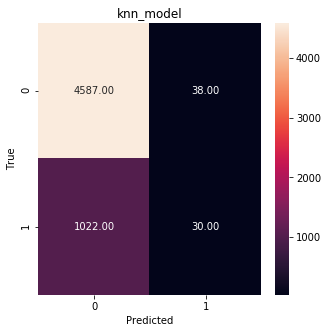

In [146]:
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_knnmodel, annot=True, fmt='.2f',ax=ax)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('knn_model')

### Logistic regression

In [147]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=100000,max_iter=1000,random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
accuracy_log = accuracy_score(y_train, logreg.predict(X_train))

f1_score_log = f1_score(y_train, logreg.predict(X_train))

print('Logistic regression accuracy: {:.3f}'.format(accuracy_log))
print('Logistic regression f1 score: {:.3f}'.format(f1_score_log))

Logistic regression accuracy: 0.826
Logistic regression f1 score: 0.163


In [149]:
accuracy_log = accuracy_score(y_test, logreg.predict(X_test))
acc.update({'LogisticRegression' : accuracy_log})

f1_score_log = f1_score(y_test, logreg.predict(X_test))
f1.update({'LogisticRegression' : f1_score_log})

print('Logistic regression accuracy: {:.3f}'.format(accuracy_log))
print('Logistic regression f1 score: {:.3f}'.format(f1_score_log))

Logistic regression accuracy: 0.826
Logistic regression f1 score: 0.174


In [150]:
scores=cross_val_score(logreg,X,y,cv=10)
scores.sort()
accuracy_log_cv=scores.mean()
acc_cv.update({'LogisticRegression' : accuracy_log_cv})
    
print(scores)
print(accuracy_log_cv)

[0.82205779 0.82205779 0.82205779 0.82241015 0.82417195 0.82452431
 0.82522903 0.8255814  0.82599507 0.82669954]
0.8240784815147718


In [151]:
prediction_log= logreg.predict(X_test)

In [152]:
print(classification_report(y_test,prediction_log))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      4625
           1       0.73      0.10      0.17      1052

    accuracy                           0.83      5677
   macro avg       0.78      0.55      0.54      5677
weighted avg       0.81      0.83      0.77      5677



In [153]:
cm_lr = confusion_matrix(y_test, prediction_log) 
cm_lr

array([[4587,   38],
       [ 948,  104]], dtype=int64)

Text(0.5, 1, 'log_model')

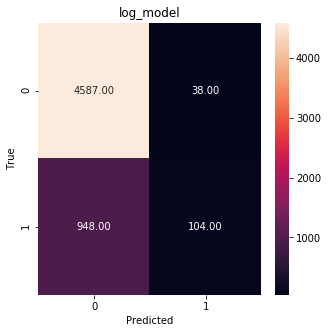

In [154]:
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_lr, annot=True, fmt='.2f',ax=ax )
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('log_model')

### Decision tree

In [155]:
from sklearn.tree import DecisionTreeClassifier 

dtree_model = DecisionTreeClassifier(max_depth = 8,max_features='auto',random_state=0)
dtree_model.fit(X_train,y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [156]:
accuracy_dtree_model=accuracy_score(y_train, dtree_model.predict(X_train))

f1_score_dtree_model=f1_score(y_train, dtree_model.predict(X_train))

print('Decision Tree accuracy: {:.3f}'.format(accuracy_dtree_model))
print('Decision Tree f1 score: {:.3f}'.format(f1_score_dtree_model))

Decision Tree accuracy: 0.858
Decision Tree f1 score: 0.483


In [157]:
accuracy_dtree_model=accuracy_score(y_test, dtree_model.predict(X_test))
acc.update({'DecisionTree': accuracy_dtree_model})

f1_score_dtree_model=f1_score(y_test, dtree_model.predict(X_test))
f1.update({'DecisionTree': f1_score_dtree_model})

print('Decision Tree accuracy: {:.3f}'.format(accuracy_dtree_model))
print('Decision Tree f1 score: {:.3f}'.format(f1_score_dtree_model))

Decision Tree accuracy: 0.840
Decision Tree f1 score: 0.413


In [158]:
def score(k):
    train_f1 = []
    test_f1 = []
    
    for i in k:
        clf = DecisionTreeClassifier(max_depth = i,max_features='auto',random_state=0)
        clf.fit(X_train,y_train)
        
        tmp = clf.predict(X_train)
        x = f1_score(tmp,y_train)
        train_f1.append(x)
        
        tmp = clf.predict(X_test)
        x = f1_score(tmp,y_test)
        test_f1.append(x)
    return train_f1,test_f1

In [159]:
#k = range(1,40)

In [160]:
#train_f1,test_f1 = score(k)

In [161]:
#score = pd.DataFrame({'train f1 score':train_f1,'test f1 score':test_f1},index=k)
#score

In [162]:
#fig,axs = plt.subplots(1,fig_size=(10,10))

#axs.plot(k,train_f1,color='green',label='train')
#axs.plot(k,test_f1,color='red',label='test')
#axs.set_xlabel('Decision Tree classifier')
#axs.set_ylabel('F1 score')
#axs.set_title('F1 score curve')

#plt.legend()

In [163]:
dtree_model = DecisionTreeClassifier(max_depth = 8,max_features='auto',random_state=0)
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [164]:
accuracy_dtree_model=accuracy_score(y_test, dtree_model.predict(X_test))
acc.update({'DecisionTree': accuracy_dtree_model})

f1_score_dtree_model=f1_score(y_test, dtree_model.predict(X_test))
f1.update({'DecisionTree': f1_score_dtree_model})

print('Decision Tree accuracy: {:.3f}'.format(accuracy_dtree_model))
print('Decision Tree f1 score: {:.3f}'.format(f1_score_dtree_model))

Decision Tree accuracy: 0.840
Decision Tree f1 score: 0.413


In [165]:
scores=cross_val_score(dtree_model,X,y,cv=10)
scores.sort()
accuracy_dtree_model_cv=scores.mean()
acc_cv.update({'DecisionTree': accuracy_dtree_model_cv})

print(scores)
print(accuracy_dtree_model_cv)

[0.83086681 0.83086681 0.83333333 0.84214235 0.84219796 0.84425652
 0.85059901 0.85236082 0.85271318 0.86579782]
0.8445134603321648


In [166]:
prediction_dtree_model = dtree_model.predict(X_test)

In [167]:
print(classification_report(y_test,prediction_dtree_model))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4625
           1       0.64      0.30      0.41      1052

    accuracy                           0.84      5677
   macro avg       0.75      0.63      0.66      5677
weighted avg       0.82      0.84      0.82      5677



In [168]:
cm_dtree_model = confusion_matrix(y_test, prediction_dtree_model) 
cm_dtree_model

array([[4447,  178],
       [ 732,  320]], dtype=int64)

Text(0.5, 1, 'dtree_model')

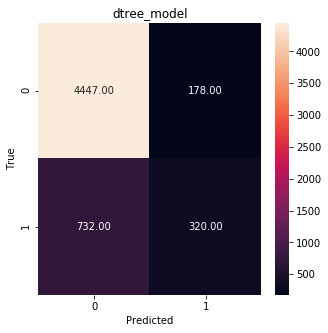

In [169]:
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_dtree_model, annot=True, fmt='.2f',ax=ax)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('dtree_model')

### Random forest

In [170]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=200,max_depth=8,random_state=0)
rfm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [171]:
accuracy_rfm=accuracy_score(y_train, rfm.predict(X_train))

f1_score_rfm=f1_score(y_train, rfm.predict(X_train))

print('Random Forest accuracy: {:.3f}'.format(accuracy_rfm))
print('Random Forest f1 score: {:.3f}'.format(f1_score_rfm))

Random Forest accuracy: 0.877
Random Forest f1 score: 0.553


In [172]:
accuracy_rfm=accuracy_score(y_test, rfm.predict(X_test))
acc.update({'RandomForest': accuracy_rfm})

f1_score_rfm=f1_score(y_test, rfm.predict(X_test))
f1.update({'RandomForest': f1_score_rfm})

print('Random Forest accuracy: {:.3f}'.format(accuracy_rfm))
print('Random Forest f1 score: {:.3f}'.format(f1_score_rfm))

Random Forest accuracy: 0.858
Random Forest f1 score: 0.478


In [173]:
def score(k):
    train_f1 = []
    test_f1 = []
    
    for i in k:
        clf = RandomForestClassifier(n_estimators = i,max_depth=8,random_state=0)
        clf.fit(X_train,y_train)
        
        tmp = clf.predict(X_train)
        x = f1_score(tmp,y_train)
        train_f1.append(x)
        
        tmp = clf.predict(X_test)
        x = f1_score(tmp,y_test)
        test_f1.append(x)
    return train_f1,test_f1

In [174]:
#k = [100,300,500,700,900,1000]

In [175]:
#train_f1,test_f1 = score(k)

In [176]:
#score = pd.DataFrame({'train f1 score':train_f1,'test f1 score':test_f1},index=k)
#score

In [177]:
#fig,axs = plt.subplots(1,fig_size=(10,10))

#axs.plot(k,train_f1,color='green',label='train')
#axs.plot(k,test_f1,color='red',label='test')
#axs.set_xlabel('Random Forest Classifier')
#axs.set_ylabel('F1 score')
#axs.set_title('F1 score curve')

#plt.legend()

In [178]:
rfm = RandomForestClassifier(n_estimators=200,max_depth=8,random_state=0)
rfm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [179]:
accuracy_rfm=accuracy_score(y_test, rfm.predict(X_test))
acc.update({'RandomForest': accuracy_rfm})

f1_score_rfm=f1_score(y_test, rfm.predict(X_test))
f1.update({'RandomForest': f1_score_rfm})

print('Random Forest accuracy: {:.3f}'.format(accuracy_rfm))
print('Random Forest f1 score: {:.3f}'.format(f1_score_rfm))

Random Forest accuracy: 0.858
Random Forest f1 score: 0.478


In [180]:
scores=cross_val_score(rfm,X,y,cv=10)
scores.sort()
accuracy_rfm_cv=scores.mean()
acc_cv.update({'RandomForest': accuracy_rfm_cv})
    
print(scores)
print(accuracy_rfm_cv)

[0.84601832 0.85241282 0.85271318 0.8534179  0.85940803 0.86011276
 0.86011276 0.86116984 0.86333216 0.86645525]
0.8575153014453619


In [181]:
prediction_rfm= rfm.predict(X_test)

In [182]:
print(classification_report(y_test,prediction_rfm))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      4625
           1       0.75      0.35      0.48      1052

    accuracy                           0.86      5677
   macro avg       0.81      0.66      0.70      5677
weighted avg       0.85      0.86      0.84      5677



In [183]:
cm_rfm = confusion_matrix(y_test, prediction_rfm) 
cm_rfm

array([[4504,  121],
       [ 684,  368]], dtype=int64)

Text(0.5, 1, 'rfm_model')

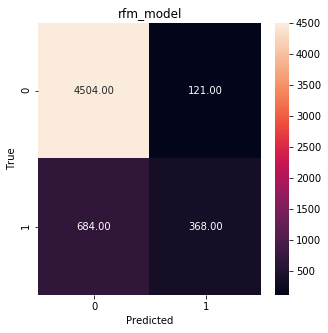

In [184]:
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_rfm, annot=True, fmt='.2f',ax=ax)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('rfm_model')

### Support Vector Machine model

In [185]:
from sklearn.svm import SVC
svm = SVC(C=2,kernel='rbf',random_state=0)
svm.fit(X_train,y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [186]:
accuracy_svm=accuracy_score(y_train, svm.predict(X_train))

f1_score_svm=f1_score(y_train, svm.predict(X_train))

print('SVM accuracy: {:.3f}'.format(accuracy_svm))
print('SVM f1 score: {:.3f}'.format(f1_score_svm))

SVM accuracy: 0.832
SVM f1 score: 0.192


In [187]:
accuracy_svm=accuracy_score(y_test, svm.predict(X_test))
acc.update({'SupportVectorMachine': accuracy_svm})

f1_score_svm=f1_score(y_test, svm.predict(X_test))
f1.update({'SupportVectorMachine': f1_score_svm})

print('SVM accuracy: {:.3f}'.format(accuracy_svm))
print('SVM f1 score: {:.3f}'.format(f1_score_svm))

SVM accuracy: 0.826
SVM f1 score: 0.161


In [188]:
scores=cross_val_score(svm,X,y,cv=10)
scores.sort()
accuracy_svm_cv=scores.mean()
acc_cv.update({'SupportVectorMachine': accuracy_svm_cv})
    
print(scores)
print(accuracy_svm_cv)

[0.82241015 0.82381959 0.82381959 0.82388165 0.82452431 0.82458612
 0.82593376 0.82628612 0.82663848 0.82699084]
0.8248890603322643


In [189]:
prediction_svm = svm.predict(X_test)

In [190]:
print(classification_report(y_test,prediction_svm))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      4625
           1       0.74      0.09      0.16      1052

    accuracy                           0.83      5677
   macro avg       0.78      0.54      0.53      5677
weighted avg       0.81      0.83      0.77      5677



In [191]:
cm_svm = confusion_matrix(y_test, prediction_svm) 
cm_svm

array([[4592,   33],
       [ 957,   95]], dtype=int64)

Text(0.5, 1, 'svm')

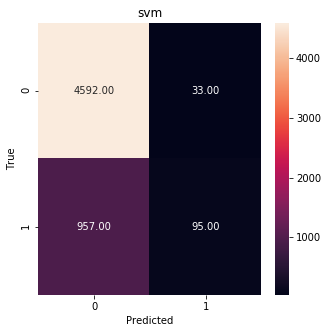

In [192]:
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_svm, annot=True, fmt='.2f',ax=ax)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('svm')

### Gaussian Naive bayes classifier

In [193]:
from sklearn.naive_bayes import GaussianNB
gaussianmodel=  GaussianNB()
gaussianmodel.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [194]:
accuracy_gaussianmodel=accuracy_score(y_train, gaussianmodel.predict(X_train))

f1_score_gaussianmodel=f1_score(y_train, gaussianmodel.predict(X_train))

print('Gaussian Naive bayes accuracy: {:.3f}'.format(accuracy_gaussianmodel))
print('Gaussian Naive bayes f1 score: {:.3f}'.format(f1_score_gaussianmodel))

Gaussian Naive bayes accuracy: 0.806
Gaussian Naive bayes f1 score: 0.097


In [195]:
accuracy_gaussianmodel=accuracy_score(y_test, gaussianmodel.predict(X_test))
acc.update({'Gaussianmodel': accuracy_gaussianmodel})

f1_score_gaussianmodel=f1_score(y_test, gaussianmodel.predict(X_test))
f1.update({'Gaussianmodel': f1_score_gaussianmodel})

print('Gaussian Naive bayes accuracy: {:.3f}'.format(accuracy_gaussianmodel))
print('Gaussian Naive bayes f1 score: {:.3f}'.format(f1_score_gaussianmodel))

Gaussian Naive bayes accuracy: 0.805
Gaussian Naive bayes f1 score: 0.101


In [196]:
scores=cross_val_score(gaussianmodel,X,y,cv=10)
scores.sort()
accuracy_gaussianmodel_cv=scores.mean()
acc_cv.update({'Gaussianmodel': accuracy_gaussianmodel_cv})

print(scores)
print(accuracy_gaussianmodel_cv)

[0.79880197 0.8030303  0.80486087 0.80584919 0.80620155 0.80655391
 0.80767876 0.8111346  0.8111346  0.81219168]
0.8067437441992027


In [197]:
prediction_gaussianmodel = gaussianmodel.predict(X_test)

In [198]:
print(classification_report(y_test,prediction_gaussianmodel))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4625
           1       0.34      0.06      0.10      1052

    accuracy                           0.80      5677
   macro avg       0.58      0.52      0.50      5677
weighted avg       0.73      0.80      0.74      5677



In [199]:
cm_gaussianmodel = confusion_matrix(y_test, prediction_gaussianmodel) 
cm_gaussianmodel

array([[4506,  119],
       [ 990,   62]], dtype=int64)

Text(0.5, 1, 'gaussianmodel')

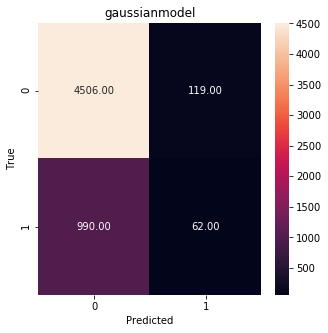

In [200]:
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_gaussianmodel, annot=True, fmt='.2f',ax=ax)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('gaussianmodel')

## Performance metrics of different models

In [201]:
#accuracy before cross validation
print(acc)

{'KNeighbors': 0.8132816628500968, 'LogisticRegression': 0.8263167165756562, 'DecisionTree': 0.8397040690505548, 'RandomForest': 0.8581997533908755, 'SupportVectorMachine': 0.8256121190769773, 'Gaussianmodel': 0.8046503434912806}


In [202]:
#accuracy after cross validation
print(acc_cv)

{'KNeighbors': 0.8144244529222862, 'LogisticRegression': 0.8240784815147718, 'DecisionTree': 0.8445134603321648, 'RandomForest': 0.8575153014453619, 'SupportVectorMachine': 0.8248890603322643, 'Gaussianmodel': 0.8067437441992027}


In [203]:
# f1 scores
print(f1)

{'KNeighbors': 0.05357142857142857, 'LogisticRegression': 0.17420435510887775, 'DecisionTree': 0.41290322580645167, 'RandomForest': 0.4776119402985074, 'SupportVectorMachine': 0.1610169491525424, 'Gaussianmodel': 0.10056772100567721}


## Ensemble different models

In [204]:
# Using Logistic regression,Random Forest,Decision Tree,Support Vector Machine
from statistics import mode
prediction = np.array([])
for i in range(len(X_test)):
    prediction = np.append(prediction,mode([prediction_log[i],prediction_rfm[i],prediction_knnmodel[i]
                                            ,prediction_dtree_model[i],prediction_svm[i]]))

In [205]:
acc = accuracy_score(y_test,prediction)
print(acc)

0.825788268451647


In [206]:
f1  = f1_score(y_test,prediction)
print(f1)

0.1437229437229437


In [207]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90      4625
           1       0.81      0.08      0.14      1052

    accuracy                           0.83      5677
   macro avg       0.82      0.54      0.52      5677
weighted avg       0.82      0.83      0.76      5677



In [208]:
cm_model = confusion_matrix(y_test, prediction) 
cm_model

array([[4605,   20],
       [ 969,   83]], dtype=int64)

Text(0.5, 1, 'model')

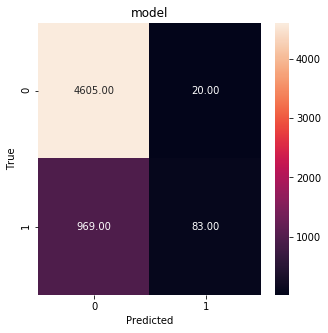

In [209]:
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_model, annot=True, fmt='.2f',ax=ax)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('model')

## Saving the model to disk

In [210]:
import joblib
filename = 'model_svm.pkl'
joblib.dump(svm,open(filename,'wb'))

In [211]:
filename = 'model_dtree.pkl'
joblib.dump(dtree_model,open(filename,'wb'))

In [212]:
filename = 'model_rfm.pkl'
joblib.dump(rfm,open(filename,'wb'))